In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gpplot as gpp
from scipy import stats
from scipy.stats import normaltest
gpp.set_aesthetics(context = 'paper')

Avana Log Fold Changes downloaded from [DepMap](https://depmap.org/portal/data_page/?tab=allData&releasename=DepMap+Public+24Q2&filename=AvanaLogfoldChange.csv), 24Q2

This notebook cleans the data in preparation for external validation of Aggregate CFD Score on cell lines stratified to exemplify the performance of this metric on cell lines with variable tolerance of double stranded breaks.

In [2]:
avana_lfcs = pd.read_csv("../Data/AvanaLogFoldChange.csv")
avana_lfcs

,Unnamed: 0,Colo699-311cas9-RepA-p6_Avana-4,Colo699-311cas9-RepB-p6_Avana-4,HSB-2-311cas9_RepA_p4_Avana-3,HSB-2-311cas9_RepB_p4_Avana-3,NCIH1339-311Cas9_RepA_p6_Avana-3,NCIH1339-311Cas9_RepB_p6_Avana-3,HEL-311Cas9_RepA_p4_Avana-3,HEL-311Cas9_RepB_p4_Avana-3,HEL9217-311Cas9_RepA_p6_Avana-3,...,A549H3-311Cas9-AVANA-P6-RepA-(-Dox)_Avana-4,A549H3-311Cas9-AVANA-P6-RepB-(+Dox)_Avana-4,A549H3-311Cas9-AVANA-P6-RepB-(-Dox)_Avana-4,UPMM3-311cas9-RepB-p4_Avana-4,UACC3133-311Cas9-RepA-P6_Avana-4,HMMME-311cas9-RepA-p6_Avana-4,HMMME-311cas9-RepB-p6_Avana-4,UACC3133-311Cas9-RepB-P6_Avana-4,LU139-311cas9-RepB-p5_Avana-4,UPMM3-311cas9-RepA-p4_Avana-4
0,AAAAAAATCCAGCAATGCAG,-0.168124,0.032433,0.072482,0.165692,0.240880,0.231994,-0.170407,0.159586,0.110935,...,0.097110,-0.574417,-0.459788,-0.561500,0.019418,-0.577435,-0.265588,-0.030857,-0.082378,-0.641148
1,AAAAAACCCGTAGATAGCCT,-0.399196,-0.304324,-0.310116,-0.430973,-0.569703,-0.553821,-0.702857,-0.311663,-0.206884,...,-0.209010,-0.351770,-0.099677,-0.323074,-0.502285,0.162024,-0.077734,-0.741033,-0.152135,-0.687654
2,AAAAAAGAAGAAAAAACCAG,-0.407507,-0.609536,-0.209280,0.139764,-0.585435,-0.971562,0.462072,0.699254,0.179225,...,-0.234573,0.036227,0.487646,0.187105,-0.295084,-1.389206,-1.290642,0.610794,-1.209052,-0.027452
3,AAAAAAGCTCAAGAAGGAGG,-0.388329,-0.520172,-0.744881,-0.440337,-0.649809,0.129801,-0.865037,-0.182568,0.054843,...,-0.468861,-0.305459,-0.216319,-0.862401,-0.249109,0.221974,-0.159175,0.071662,-0.915871,-0.840351
4,AAAAAAGGCTGTAAAAGCGT,-0.526602,-0.075479,-0.174453,-0.706178,-0.060638,-0.464209,0.236947,-0.268153,0.196136,...,-0.538994,-0.894602,0.001893,0.286687,-0.270900,0.121803,0.251099,0.056755,-0.297120,-0.186040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74682,TTTGTTTGTCTCATTCATGG,0.072566,-0.002119,0.510224,0.333868,0.095353,-0.291724,0.143841,-0.041514,-0.008328,...,0.141737,0.322930,0.317172,0.655751,0.117390,0.037850,0.002575,0.180749,0.286052,0.112876
74683,TTTTACCTTGTTCACATGGA,0.088879,0.295562,0.210040,0.213830,0.373211,0.232899,0.648457,-0.277780,0.126129,...,0.725110,0.521472,0.391909,0.414804,0.137655,0.555024,0.569523,-0.149160,0.568548,0.083119
74684,TTTTGACTCTAATCACCGGT,0.007554,-0.382952,0.185059,0.224696,0.043437,0.251539,-0.526657,0.495246,-0.372312,...,0.291722,0.595607,0.139159,0.207082,-0.569714,0.792678,0.706651,-0.149602,0.603911,0.536712
74685,TTTTTAATACAAGGTAATCT,-0.004181,0.157381,-0.218985,-0.149060,-0.014984,-0.020878,0.246076,0.249417,-0.196225,...,0.296801,0.799592,0.627308,0.148630,0.157628,0.509013,0.577039,-0.152684,0.400559,0.396579


In [3]:
#file to isolate the metadata from DepMap to replace column name (sequence ID) with cell line
avana_metadata = pd.read_csv("../Data/ScreenSequenceMap.csv")
cell_line_name_map= avana_metadata.set_index('SequenceID').to_dict()['ModelID']
avana_lfcs.columns = avana_lfcs.columns.to_series().map(cell_line_name_map)
avana_lfcs = avana_lfcs.rename(columns={np.nan: 'Construct Barcode'})
avana_lfcs

,Construct Barcode,ACH-001041,ACH-001041,ACH-001737,ACH-001737,ACH-000921,ACH-000921,ACH-000004,ACH-000004,ACH-000005,...,ACH-003012,ACH-003012,ACH-003012,ACH-002925,ACH-001683,ACH-002033,ACH-002033,ACH-001683,ACH-002052,ACH-002925
0,AAAAAAATCCAGCAATGCAG,-0.168124,0.032433,0.072482,0.165692,0.240880,0.231994,-0.170407,0.159586,0.110935,...,0.097110,-0.574417,-0.459788,-0.561500,0.019418,-0.577435,-0.265588,-0.030857,-0.082378,-0.641148
1,AAAAAACCCGTAGATAGCCT,-0.399196,-0.304324,-0.310116,-0.430973,-0.569703,-0.553821,-0.702857,-0.311663,-0.206884,...,-0.209010,-0.351770,-0.099677,-0.323074,-0.502285,0.162024,-0.077734,-0.741033,-0.152135,-0.687654
2,AAAAAAGAAGAAAAAACCAG,-0.407507,-0.609536,-0.209280,0.139764,-0.585435,-0.971562,0.462072,0.699254,0.179225,...,-0.234573,0.036227,0.487646,0.187105,-0.295084,-1.389206,-1.290642,0.610794,-1.209052,-0.027452
3,AAAAAAGCTCAAGAAGGAGG,-0.388329,-0.520172,-0.744881,-0.440337,-0.649809,0.129801,-0.865037,-0.182568,0.054843,...,-0.468861,-0.305459,-0.216319,-0.862401,-0.249109,0.221974,-0.159175,0.071662,-0.915871,-0.840351
4,AAAAAAGGCTGTAAAAGCGT,-0.526602,-0.075479,-0.174453,-0.706178,-0.060638,-0.464209,0.236947,-0.268153,0.196136,...,-0.538994,-0.894602,0.001893,0.286687,-0.270900,0.121803,0.251099,0.056755,-0.297120,-0.186040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74682,TTTGTTTGTCTCATTCATGG,0.072566,-0.002119,0.510224,0.333868,0.095353,-0.291724,0.143841,-0.041514,-0.008328,...,0.141737,0.322930,0.317172,0.655751,0.117390,0.037850,0.002575,0.180749,0.286052,0.112876
74683,TTTTACCTTGTTCACATGGA,0.088879,0.295562,0.210040,0.213830,0.373211,0.232899,0.648457,-0.277780,0.126129,...,0.725110,0.521472,0.391909,0.414804,0.137655,0.555024,0.569523,-0.149160,0.568548,0.083119
74684,TTTTGACTCTAATCACCGGT,0.007554,-0.382952,0.185059,0.224696,0.043437,0.251539,-0.526657,0.495246,-0.372312,...,0.291722,0.595607,0.139159,0.207082,-0.569714,0.792678,0.706651,-0.149602,0.603911,0.536712
74685,TTTTTAATACAAGGTAATCT,-0.004181,0.157381,-0.218985,-0.149060,-0.014984,-0.020878,0.246076,0.249417,-0.196225,...,0.296801,0.799592,0.627308,0.148630,0.157628,0.509013,0.577039,-0.152684,0.400559,0.396579


Not checking replicate correlations because some cell lines have replicates, others do not. Averaging log fold change between replicates.

In [4]:
long_lfcs = (avana_lfcs.melt(id_vars='Construct Barcode',
                         var_name='Cell type', value_name='lfc'))
avg_lfcs = (long_lfcs.groupby(['Construct Barcode', 'Cell type'])
            .agg(avg_lfc = ('lfc', 'mean'),
                 n_obs = ('lfc', 'count'))
            .reset_index())
avg_lfcs

,Construct Barcode,Cell type,avg_lfc,n_obs
0,AAAAAAATCCAGCAATGCAG,ACH-000004,-0.005410,2
1,AAAAAAATCCAGCAATGCAG,ACH-000005,0.282879,2
2,AAAAAAATCCAGCAATGCAG,ACH-000007,0.070260,2
3,AAAAAAATCCAGCAATGCAG,ACH-000009,-0.324254,3
4,AAAAAAATCCAGCAATGCAG,ACH-000011,-0.195436,1
...,...,...,...,...
80886016,TTTTTCTCACCCGATGAATC,ACH-002847,0.317386,2
80886017,TTTTTCTCACCCGATGAATC,ACH-002922,0.481473,2
80886018,TTTTTCTCACCCGATGAATC,ACH-002925,0.130246,2
80886019,TTTTTCTCACCCGATGAATC,ACH-002926,0.433874,2


Uploading data from [nat comm 2022](https://www.nature.com/articles/s41467-022-32285-1#MOESM4): identifying cell lines that are TP53 mutated vs. wildtype.  0 indicates wild-type, 1 indicates mutated phenotype 

In [5]:
#associates Cell Line ID with TP53 mutation status 
tp53_mut_cells= pd.read_excel("../Data/TP53_Mutated/41467_2022_32285_MOESM4_ESM.xlsx",sheet_name='Supplementary Dataset 1')
tp53_mut_cells

,Cell line Broad ID,TP53 mutation status,HR mutation status,Tissue
0,ACH-000001,1,0,ovary
1,ACH-000002,0,0,blood
2,ACH-000003,1,0,colorectal
3,ACH-000004,1,0,blood
4,ACH-000005,1,0,blood
...,...,...,...,...
1818,ACH-002475,1,0,engineered blood
1819,ACH-002508,1,1,skin
1820,ACH-002509,0,0,skin
1821,ACH-002510,0,0,skin


In [6]:
avg_lfcs_withtp53status=avg_lfcs.merge(tp53_mut_cells,left_on="Cell type",right_on="Cell line Broad ID")


In [7]:
dsb_low_sensitivity= avg_lfcs_withtp53status[avg_lfcs_withtp53status["TP53 mutation status"]==1].reset_index(drop=True).copy()
dsb_high_sensitivity= avg_lfcs_withtp53status[avg_lfcs_withtp53status["TP53 mutation status"]==0].reset_index(drop=True).copy()
dsb_high_sensitivity

,Construct Barcode,Cell type,avg_lfc,n_obs,Cell line Broad ID,TP53 mutation status,HR mutation status,Tissue
0,AAAAAAATCCAGCAATGCAG,ACH-000007,0.070260,2,ACH-000007,0,0,colorectal
1,AAAAAAATCCAGCAATGCAG,ACH-000011,-0.195436,1,ACH-000011,0,1,urinary tract
2,AAAAAAATCCAGCAATGCAG,ACH-000012,-0.509298,3,ACH-000012,0,0,lung
3,AAAAAAATCCAGCAATGCAG,ACH-000019,0.092682,2,ACH-000019,0,1,breast
4,AAAAAAATCCAGCAATGCAG,ACH-000025,-0.173912,2,ACH-000025,0,0,central nervous system
...,...,...,...,...,...,...,...,...
28679803,TTTTTCTCACCCGATGAATC,ACH-002464,0.487534,2,ACH-002464,0,0,engineered
28679804,TTTTTCTCACCCGATGAATC,ACH-002466,-0.204442,2,ACH-002466,0,0,engineered
28679805,TTTTTCTCACCCGATGAATC,ACH-002467,0.984386,1,ACH-002467,0,0,engineered
28679806,TTTTTCTCACCCGATGAATC,ACH-002510,0.323611,2,ACH-002510,0,0,skin


In [8]:
print("# TP53 mutant cell lines:", len(dsb_low_sensitivity["Cell type"].unique()))
print("# TP53 WT cell lines:",len(dsb_high_sensitivity["Cell type"].unique()))

# TP53 mutant cell lines: 623
# TP53 WT cell lines: 384


For low and high sensitvity cell lines separately, get the median log fold change for each guide across cell lines

In [9]:
dsb_high_sensitivity_med=(dsb_high_sensitivity.groupby('Construct Barcode')
            .agg(med_avg_lfc = ('avg_lfc', 'median'))
            .reset_index())
dsb_low_sensitivity_med=(dsb_low_sensitivity.groupby('Construct Barcode')
            .agg(med_avg_lfc = ('avg_lfc', 'median'))
            .reset_index())

Guide mappings from GPP internal LIMS tool associate guide sequences to target gene with respect to the most recent protein coding annotations. 

In [10]:
avana_mapping = pd.read_csv("../Data/avana_adhoc_sgRNA_disco_GRCh38_Ensembl_SpyoCas9Ko_strict.csv")
avana_mapping

,Target Sequence,On-target Gene IDs,On-target Gene Symbols,Notes,Reference DB,CRISPR System,Precision
0,AAAAAAATCCAGCAATGCAG,ENSG00000108061,SHOC2,NaN,Human - GRCh38 Ensembl,SpyoCas9 CRISPRko,strict
1,AAAAAACCCGTAGATAGCCT,ENSG00000184752,NDUFA12,NaN,Human - GRCh38 Ensembl,SpyoCas9 CRISPRko,strict
2,AAAAAAGAAGAAAAAACCAG,ENSG00000198301,SDAD1,NaN,Human - GRCh38 Ensembl,SpyoCas9 CRISPRko,strict
3,AAAAAAGCTCAAGAAGGAGG,ENSG00000119812,FAM98A,NaN,Human - GRCh38 Ensembl,SpyoCas9 CRISPRko,strict
4,AAAAAAGGCTGTAAAAGCGT,ENSG00000256771,ZNF253,NaN,Human - GRCh38 Ensembl,SpyoCas9 CRISPRko,strict
...,...,...,...,...,...,...,...
74682,TTTGTTTGTCTCATTCATGG,ENSG00000253313,C1orf210,NaN,Human - GRCh38 Ensembl,SpyoCas9 CRISPRko,strict
74683,TTTTACCTTGTTCACATGGA,NaN,NaN,INACTIVE_4T; POTENTIALLY_ACTIVE,Human - GRCh38 Ensembl,SpyoCas9 CRISPRko,strict
74684,TTTTGACTCTAATCACCGGT,NaN,NaN,INACTIVE_4T; NO_SITE (4 zeros),Human - GRCh38 Ensembl,SpyoCas9 CRISPRko,strict
74685,TTTTTAATACAAGGTAATCT,NaN,NaN,INACTIVE_5T; NO_SITE (5 zeros),Human - GRCh38 Ensembl,SpyoCas9 CRISPRko,strict


Identify which guides are nonessential-targeting. This is complicated by the fact that, with updated mappings, some guides are reported to target multiple genes. Nonessential guides are defined as those whose list of targeting genes includes at least one nonessential gene and does not include any essential genes. 

To identify nonessential genes in the data, the nonessential list is dowloaded from [depmap](https://depmap.org/portal/data_page/?tab=allData&releasename=DepMap+Public+24Q2&filename=AchillesNonessentialControls.csv) 24Q2. This is the Hart 2014 list used to define nonessentials in DeWeirdt 2022.

[Source](https://depmap.org/portal/data_page/?tab=allData&releasename=DepMap+Public+24Q2&filename=AchillesCommonEssentialControls.csv) for essential-targeting genes: overlap between Biomen 2014 and Hart 2015

In [11]:
noness_genes = pd.read_csv("../Data/AchillesNonessentialControls.csv")
noness_genes["Gene"]=noness_genes["Gene"].apply(lambda x: x.split("(")[0])
#remove space from gene name 
noness_genes["Gene"]=noness_genes["Gene"].str.replace(" ","")
noness_gene_list=noness_genes["Gene"].tolist()

essential_genes = pd.read_csv("../Data/AchillesCommonEssentialControls.csv")
essential_genes["Gene"]=essential_genes["Gene"].apply(lambda x: x.split("(")[0])
#remove space from gene name 
essential_genes["Gene"]=essential_genes["Gene"].str.replace(" ","")
essential_gene_list=essential_genes["Gene"].tolist()


In [12]:
'''
Function that identifies if each guide targets a nonessential gene and,
if multiple genes are listed, that none of them are essential 
'''
def check_noness(row):
    #separate the list of genes targeted by the guide (although most guides only target 1)
    gene_targeting_list= row["On-target Gene Symbols"].split(",")
    #variable to indicate whether or not we call this guide nonessential-targeting
    row.noness_targeting=False
    #track all genes targeted by guide that are noness
    noness_genes_targeted=[]
    #check each gene that the guide targets 
    for gene in gene_targeting_list:
        #guide must target a recognized nonessential-targeting gene to be deemed nonessential-targeting
        if noness_gene_list.count(gene)>0:
            row.noness_targeting=True
            noness_genes_targeted.append(gene)
        #guide is not nonessential-targeting if any of the genes it targets is essential 
        elif essential_gene_list.count(gene)>0:
            row.noness_targeting=False
    #in the case that this gene lists multiple targeting genes, replace with list of noness-targeting
    if row.noness_targeting:
        row["On-target Gene Symbols"]=",".join(noness_genes_targeted)
    return row       
avana_mapping["On-target Gene Symbols"]=avana_mapping["On-target Gene Symbols"].astype(str)   
avana_mapping["noness_targeting"]=avana_mapping["Notes"] #this just instantiates the column 
avana_mapping=avana_mapping.apply(check_noness,axis=1)

In [13]:
#associate screen info with guide-gene mappings 
annotated_dsb_high_sensitivity = dsb_high_sensitivity_med.merge(avana_mapping[["Target Sequence","On-target Gene Symbols","Notes","noness_targeting"]], 
                                       how = 'inner',
                                       left_on = 'Construct Barcode',
                                        right_on= "Target Sequence")
annotated_dsb_low_sensitivity = dsb_low_sensitivity_med.merge(avana_mapping[["Target Sequence","On-target Gene Symbols","Notes","noness_targeting"]], 
                                       how = 'inner',
                                       left_on = 'Construct Barcode',
                                        right_on= "Target Sequence")


74687
74687


mean lfc for low sensitivity cell lines: -0.16677307545793896
mean lfc for high sensitivity cell lines: -0.17162318341344918


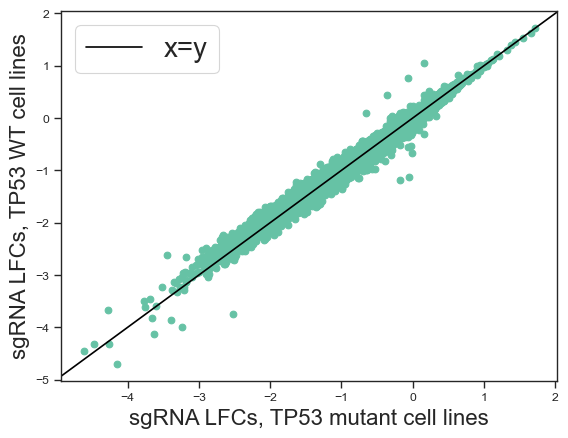

In [14]:
low_sensitivity_med_lfcs=annotated_dsb_low_sensitivity["med_avg_lfc"]
high_sensitivity_med_lfcs=annotated_dsb_high_sensitivity["med_avg_lfc"]

plt.scatter(x=low_sensitivity_med_lfcs,y=high_sensitivity_med_lfcs)

plt.axline((0, 0), slope=1,color="black",label="x=y")
plt.legend(fontsize=20)


plt.xlabel("sgRNA LFCs, TP53 mutant cell lines",fontsize=16)
plt.ylabel("sgRNA LFCs, TP53 WT cell lines",fontsize=16)

print("mean lfc for low sensitivity cell lines:",annotated_dsb_low_sensitivity["med_avg_lfc"].mean())
print("mean lfc for high sensitivity cell lines:",annotated_dsb_high_sensitivity["med_avg_lfc"].mean())

In [15]:
#get average lfc across guides for each gene
annotated_dsb_low_sensitivity["gene_average_lfc"]= annotated_dsb_low_sensitivity.groupby('On-target Gene Symbols')["med_avg_lfc"].transform('mean')
annotated_dsb_high_sensitivity["gene_average_lfc"]= annotated_dsb_high_sensitivity.groupby('On-target Gene Symbols')["med_avg_lfc"].transform('mean')


#subset data for nonessentials 
original_noness_low_sensitivity=annotated_dsb_low_sensitivity[annotated_dsb_low_sensitivity["noness_targeting"]].copy().reset_index(drop=True)
original_noness_high_sensitivity=annotated_dsb_high_sensitivity[annotated_dsb_high_sensitivity["noness_targeting"]].copy().reset_index(drop=True)

original_noness_low_sensitivity

,Construct Barcode,med_avg_lfc,Target Sequence,On-target Gene Symbols,Notes,noness_targeting,gene_average_lfc
0,AAAACCTCGGATTTCAGCCG,-0.105203,AAAACCTCGGATTTCAGCCG,FEZF1,NaN,True,0.081295
1,AAAAGAACTGAGCCAAGCAG,0.109204,AAAAGAACTGAGCCAAGCAG,OR1B1,NaN,True,0.031355
2,AAACAACGACAGCGAGACCG,0.120916,AAACAACGACAGCGAGACCG,SPACA1,NaN,True,-0.099982
3,AAACAGGGAGGTCAAAACGG,0.287824,AAACAGGGAGGTCAAAACGG,OR2T12,NaN,True,-0.163101
4,AAACCAGCTTCCCTATTCCA,-0.006272,AAACCAGCTTCCCTATTCCA,GCM2,NaN,True,-0.011922
...,...,...,...,...,...,...,...
3099,TTTGTCATTGCAGGTCATGG,0.159015,TTTGTCATTGCAGGTCATGG,DEFB103B,NaN,True,0.026780
3100,TTTGTCCCTCTGTTCCTGGT,-0.038902,TTTGTCCCTCTGTTCCTGGT,LALBA,NaN,True,0.014926
3101,TTTGTCTTCCAACAGGCCAA,0.222298,TTTGTCTTCCAACAGGCCAA,MBL2,NaN,True,0.131407
3102,TTTGTGGAAGAAAACCATAG,-0.085991,TTTGTGGAAGAAAACCATAG,CSN2,NaN,True,-0.089121


Using [essential targeting genes](https://depmap.org/portal/data_page/?tab=allData&releasename=DepMap+Public+24Q2&filename=AchillesCommonEssentialControls.csv) (overlap between Biomen 2014 and Hart 2015) to identify the log fold change associated with perturbations that have an antiproliferative effect and recognize nonessential genes that should be reclassified 

In [16]:
essentials_low_sensitivity=annotated_dsb_low_sensitivity[annotated_dsb_low_sensitivity["On-target Gene Symbols"].isin(essential_gene_list)].reset_index(drop=True).copy()
essentials_median_low_sensitivity=essentials_low_sensitivity["gene_average_lfc"].median()

essentials_high_sensitivity=annotated_dsb_high_sensitivity[annotated_dsb_high_sensitivity["On-target Gene Symbols"].isin(essential_gene_list)].reset_index(drop=True).copy()
essentials_median_high_sensitivity=essentials_high_sensitivity["gene_average_lfc"].median()

#second condition prevents a set of genes from arising as a false nonessential gene (likely depleted because it has multiple targets)
false_nonessential_genes_low_sensitivity= original_noness_low_sensitivity[(original_noness_low_sensitivity["gene_average_lfc"]<essentials_median_low_sensitivity) & (original_noness_low_sensitivity["On-target Gene Symbols"].str.count(",")==0)]["On-target Gene Symbols"].unique().tolist()
false_nonessential_genes_high_sensitivity= original_noness_high_sensitivity[(original_noness_high_sensitivity["gene_average_lfc"]<essentials_median_high_sensitivity) & (original_noness_high_sensitivity["On-target Gene Symbols"].str.count(",")==0)]["On-target Gene Symbols"].unique().tolist()

print(false_nonessential_genes_low_sensitivity)
print(false_nonessential_genes_high_sensitivity)


['FOXD4L4', 'ARGFX', 'KRTAP9-2', 'VN1R2']
['FOXD4L4', 'ARGFX', 'KRTAP9-2', 'VN1R2']


In [17]:
noness_low_sensitivity=original_noness_low_sensitivity[-original_noness_low_sensitivity["On-target Gene Symbols"].isin(false_nonessential_genes_low_sensitivity)].reset_index(drop=True).copy()
noness_high_sensitivity=original_noness_high_sensitivity[-original_noness_high_sensitivity["On-target Gene Symbols"].isin(false_nonessential_genes_high_sensitivity)].reset_index(drop=True).copy()


## Identifying promiscuous guides among nonessentials

Rationale for defining promiscuous guides explained in Avana_cleaning


In [18]:
nosites_low_sensitivity=annotated_dsb_low_sensitivity[annotated_dsb_low_sensitivity["Notes"].str.count("NO_SITE")>0].reset_index(drop=True).copy()
nosites_high_sensitivity=annotated_dsb_high_sensitivity[annotated_dsb_high_sensitivity["Notes"].str.count("NO_SITE")>0].reset_index(drop=True).copy()

#validating finding from paper that nosites have stronger advantage in DSB sensitive cell lines 
print(nosites_low_sensitivity["med_avg_lfc"].mean())
print(nosites_high_sensitivity["med_avg_lfc"].mean())

0.2086367282068619
0.24864537706730103


#### Promiscuous guides in low sensitivity data

In [19]:
essentials_mean=essentials_low_sensitivity["med_avg_lfc"].mean(axis=0)
essentials_sd=essentials_low_sensitivity["med_avg_lfc"].std(axis=0,numeric_only=True)
essentials_upper_limit= essentials_mean+(1*essentials_sd)
print("1 standard deviation above mean of essentials =",essentials_upper_limit)

noness_mean=noness_low_sensitivity["med_avg_lfc"].mean(axis=0)
noness_sd=noness_low_sensitivity["med_avg_lfc"].std(axis=0,numeric_only=True)
noness_lower_limit= noness_mean-(2*noness_sd)
print("2 standard deviations below mean of nonessentials =",noness_lower_limit)

noness_promiscuous_cutoff= min(essentials_upper_limit,noness_lower_limit)
print("lowest of all cutoffs to define promiscuous nonessentials",noness_promiscuous_cutoff)

1 standard deviation above mean of essentials = -0.38224256600351425
2 standard deviations below mean of nonessentials = -0.6401250931478715
lowest of all cutoffs to define promiscuous nonessentials -0.6401250931478715


In [20]:
noness_low_sensitivity["promiscuous"]=noness_low_sensitivity["med_avg_lfc"]<noness_promiscuous_cutoff

nontargeting_mean=nosites_low_sensitivity["med_avg_lfc"].mean(axis=0)
nontargeting_sd=nosites_low_sensitivity["med_avg_lfc"].std(axis=0,numeric_only=True)
nontargeting_lower_limit= nontargeting_mean-(1*nontargeting_sd)
print("1 standard deviation below mean of nontargeting controls =",nontargeting_lower_limit)
noness_nonpromiscuous_cutoff= nontargeting_lower_limit

1 standard deviation below mean of nontargeting controls = 0.0016543714523800934


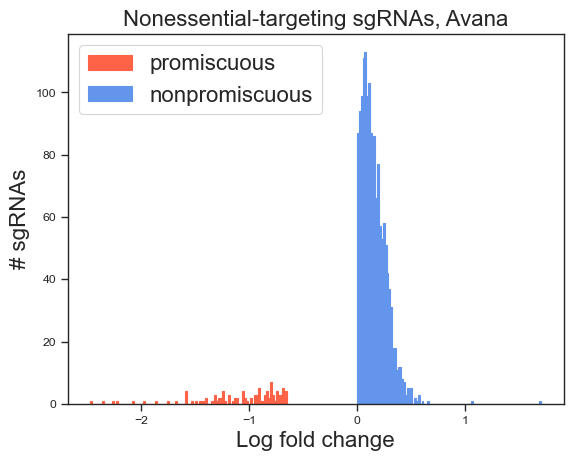

In [21]:
noness_low_sensitivity_filt=noness_low_sensitivity[(noness_low_sensitivity["med_avg_lfc"]<noness_promiscuous_cutoff) | (noness_low_sensitivity["med_avg_lfc"]>noness_nonpromiscuous_cutoff)].reset_index(drop=True).copy()

noness_low_sensitivity_filt["promiscuous"]=noness_low_sensitivity_filt["med_avg_lfc"]<noness_promiscuous_cutoff
noness_low_sensitivity_filt[noness_low_sensitivity_filt["promiscuous"]==True]["med_avg_lfc"].hist(grid=False,bins=100,label="promiscuous",color="tomato",edgecolor="tomato")
noness_low_sensitivity_filt[noness_low_sensitivity_filt["promiscuous"]==False]["med_avg_lfc"].hist(grid=False,bins=100,label="nonpromiscuous",color="cornflowerblue",edgecolor="cornflowerblue")
plt.xlabel("Log fold change",fontsize=16)
plt.ylabel("# sgRNAs",fontsize=16)
plt.title("Nonessential-targeting sgRNAs, Avana",fontsize=16)
plt.legend(fontsize=16)



In [22]:
noness_low_sensitivity_filt["promiscuous"].value_counts()


promiscuous
False    1550
True      108
Name: count, dtype: int64

In [23]:
noness_low_sensitivity_filt=noness_low_sensitivity_filt.drop(["Construct Barcode","Notes","noness_targeting","gene_average_lfc","med_avg_lfc"],axis=1)
noness_low_sensitivity_filt.to_csv("../Data/avana_noness_low_sensitivity_screenresults.csv",index=False)

#### Promiscuous guides in high sensitivity data

In [24]:
essentials_mean=essentials_high_sensitivity["med_avg_lfc"].mean(axis=0)
essentials_sd=essentials_high_sensitivity["med_avg_lfc"].std(axis=0,numeric_only=True)
essentials_upper_limit= essentials_mean+(1*essentials_sd)
print("1 standard deviation above mean of essentials =",essentials_upper_limit)

noness_mean=noness_high_sensitivity["med_avg_lfc"].mean(axis=0)
noness_sd=noness_high_sensitivity["med_avg_lfc"].std(axis=0,numeric_only=True)
noness_lower_limit= noness_mean-(2*noness_sd)
print("2 standard deviations below mean of nonessentials =",noness_lower_limit)

noness_promiscuous_cutoff= min(essentials_upper_limit,noness_lower_limit)
print("lowest of all cutoffs to define promiscuous nonessentials",noness_promiscuous_cutoff)

1 standard deviation above mean of essentials = -0.38492392178322854
2 standard deviations below mean of nonessentials = -0.6743926896288731
lowest of all cutoffs to define promiscuous nonessentials -0.6743926896288731


In [25]:
noness_high_sensitivity["promiscuous"]=noness_high_sensitivity["med_avg_lfc"]<noness_promiscuous_cutoff

nontargeting_mean=nosites_high_sensitivity["med_avg_lfc"].mean(axis=0)
nontargeting_sd=nosites_high_sensitivity["med_avg_lfc"].std(axis=0,numeric_only=True)
nontargeting_lower_limit= nontargeting_mean-(1*nontargeting_sd)
print("1 standard deviation below mean of nontargeting controls =",nontargeting_lower_limit)
noness_nonpromiscuous_cutoff= nontargeting_lower_limit

1 standard deviation below mean of nontargeting controls = 0.03577768422555855


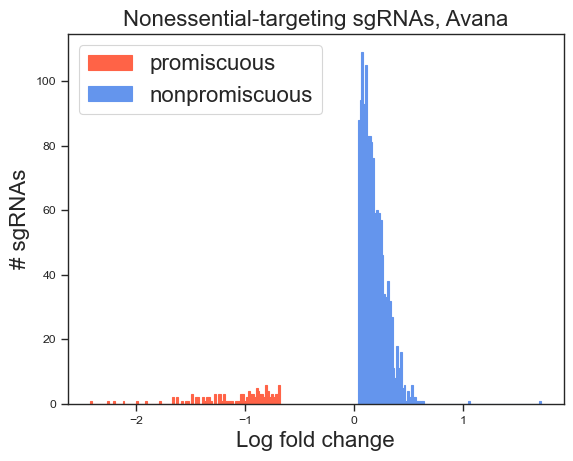

In [26]:
noness_high_sensitivity_filt=noness_high_sensitivity[(noness_high_sensitivity["med_avg_lfc"]<noness_promiscuous_cutoff) | (noness_high_sensitivity["med_avg_lfc"]>noness_nonpromiscuous_cutoff)].reset_index(drop=True).copy()

noness_high_sensitivity_filt["promiscuous"]=noness_high_sensitivity_filt["med_avg_lfc"]<noness_promiscuous_cutoff
noness_high_sensitivity_filt[noness_high_sensitivity_filt["promiscuous"]==True]["med_avg_lfc"].hist(grid=False,bins=100,label="promiscuous",color="tomato",edgecolor="tomato")
noness_high_sensitivity_filt[noness_high_sensitivity_filt["promiscuous"]==False]["med_avg_lfc"].hist(grid=False,bins=100,label="nonpromiscuous",color="cornflowerblue",edgecolor="cornflowerblue")
plt.xlabel("Log fold change",fontsize=16)
plt.ylabel("# sgRNAs",fontsize=16)
plt.title("Nonessential-targeting sgRNAs, Avana",fontsize=16)
plt.legend(fontsize=16)

In [27]:
noness_high_sensitivity_filt["promiscuous"].value_counts()


promiscuous
False    1355
True      116
Name: count, dtype: int64

It makes sense that there are a few more promiscuous guides in the high sensitivity cell line data

In [28]:
noness_high_sensitivity_filt=noness_high_sensitivity_filt.drop(["Construct Barcode","Notes","noness_targeting","gene_average_lfc","med_avg_lfc"],axis=1)
noness_high_sensitivity_filt.to_csv("../Data/avana_noness_high_sensitivity_screenresults.csv",index=False)
